# 项目：关于不同汽车车型燃料经济性的数据分析
## 目录
<ul>
    <li><a href='#intro'>简介</a></li>
    <li><a href='#wrangling'>数据整理</a></li>
    <li><a href='#eda'>探索性数据分析</a></li>
    <li><a href='#conclusions'>结论及可视化展示</a></li>
</ul>

<a id='intro'></a>
## 一. 简介
数据集来自[美国环境保护局（EPA）](https://www.epa.gov/compliance-and-fuel-economy-data/data-cars-used-testing-fuel-economy)，选取2008年和2018年的数据进行分析。汽车的燃料经济性是指车辆行驶距离与消耗的燃料量之间的燃料效率关系。在中国和欧洲，一般用行驶百公里消耗的燃油量（L）表示：L/100km，所以数值越小，燃油经济性越好；在美国，一般用每加仑燃油能行驶的里程数表示：mile/gal，所以数值越大，燃油经济性越好。

提出问题：
- 是否有更多使用替代燃料来源的不同车型？ 具体多多少？
- 车辆种类在燃油经济性方面有多少改进？
- SmartWay车辆的特点是什么？它们是否随着时间而改变？
- 哪些特征与更好的燃料经济型相关联？

In [1]:
# 导入需要用到的包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# 数据可视化相关设置
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

<a id='wrangling'></a>
## 二. 数据整理

燃料经济型数据的特征值及其描述：
- Model：车辆品牌和型号
- Displ：发动机排量 - 发动机的大小（升）
- Cyl：特定发动机中的气缸数
- Trans：传动类型和齿轮数
- Drive：驱动轴类型（2WD = 2 轮驱动，4WD = 4 轮/全轮驱动）
- Fuel：燃油类型
- Cert Region：认证区域代码（*不包括在2008数据集中*）
- Sales Area：认证区域代码（*不包括在2018数据集中*）
- Stnd：车辆排放标准代码（*不包括在2008数据集中*）
- Stnd Description：车辆排放标准说明
- Underhood ID：这是一个 12 位数的识别号码，可以在发动机舱排放标签上找到。EPA 要求使用此号码指定其"测定组"或"发动机系列"
- Veh Class：EPA 车辆类型
- Air Pollution Score：空气污染评分（烟雾等级）
- City MPG：估计的城市 mpg（英里/加仑）
- Hwy MPG：估计的高速公路 mpg（英里/加仑）
- Cmb MPG：估计的综合 mpg（英里/加仑）
- Greenhouse Gas Score：温室气体等级
- SmartWay：是、否或 Elite
- Comb CO2：城市/高速公路综合二氧化碳尾气排放量（以克/英里为单位）（*不包括在2008数据集中*）

### 2.1 评估数据
#### 评估2008年的数据

In [2]:
# 读取08年的数据
df_08 = pd.read_csv('data/all_alpha_08.csv')
df_08.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15,20,17,22.0527,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT03.7PKR,SUV,6,Drv,15,20,17,22.0527,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT02.3DKR,SUV,7,Drv,17,22,19,24.1745,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT02.3DKR,SUV,6,Drv,17,22,19,24.1745,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXV03.5HKR,midsize car,7,Drv,16,24,19,24.5629,5,no


In [3]:
df_08.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2404 entries, 0 to 2403
Data columns (total 18 columns):
Model                   2404 non-null object
Displ                   2404 non-null float64
Cyl                     2205 non-null object
Trans                   2205 non-null object
Drive                   2311 non-null object
Fuel                    2404 non-null object
Sales Area              2404 non-null object
Stnd                    2404 non-null object
Underhood ID            2404 non-null object
Veh Class               2404 non-null object
Air Pollution Score     2404 non-null object
FE Calc Appr            2205 non-null object
City MPG                2205 non-null object
Hwy MPG                 2205 non-null object
Cmb MPG                 2205 non-null object
Unadj Cmb MPG           2205 non-null float64
Greenhouse Gas Score    2205 non-null object
SmartWay                2404 non-null object
dtypes: float64(2), object(16)
memory usage: 338.1+ KB


In [4]:
# 重复行数
sum(df_08.duplicated())

25

In [5]:
# 具有缺失值的行数
sum(df_08.isnull().any(axis=1))

199

In [6]:
# 每个特征的非不同值个数
df_08.nunique()

Model                   436
Displ                    47
Cyl                       8
Trans                    14
Drive                     2
Fuel                      5
Sales Area                3
Stnd                     12
Underhood ID            343
Veh Class                 9
Air Pollution Score      13
FE Calc Appr              2
City MPG                 39
Hwy MPG                  43
Cmb MPG                  38
Unadj Cmb MPG           721
Greenhouse Gas Score     20
SmartWay                  2
dtype: int64

#### 评估2018年数据

In [7]:
# 读取18年的数据
df_18 = pd.read_csv('data/all_alpha_18.csv')
df_18.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
2,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
3,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
4,ACURA TLX,2.4,4.0,AMS-8,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,JHNXV02.4WH3,small car,3,23,33,27,6,No,330


In [8]:
df_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1611 entries, 0 to 1610
Data columns (total 18 columns):
Model                   1611 non-null object
Displ                   1609 non-null float64
Cyl                     1609 non-null float64
Trans                   1611 non-null object
Drive                   1611 non-null object
Fuel                    1611 non-null object
Cert Region             1611 non-null object
Stnd                    1611 non-null object
Stnd Description        1611 non-null object
Underhood ID            1611 non-null object
Veh Class               1611 non-null object
Air Pollution Score     1611 non-null int64
City MPG                1611 non-null object
Hwy MPG                 1611 non-null object
Cmb MPG                 1611 non-null object
Greenhouse Gas Score    1611 non-null int64
SmartWay                1611 non-null object
Comb CO2                1611 non-null object
dtypes: float64(2), int64(2), object(14)
memory usage: 226.6+ KB


In [9]:
# 重复行数
sum(df_18.duplicated())

0

In [10]:
# 具有缺失值的行数
sum(df_18.isnull().sum(axis=1))

4

In [11]:
# 每个特征的非不同值个数
df_18.nunique()

Model                   367
Displ                    36
Cyl                       7
Trans                    26
Drive                     2
Fuel                      5
Cert Region               2
Stnd                     19
Stnd Description         19
Underhood ID            230
Veh Class                 9
Air Pollution Score       6
City MPG                 58
Hwy MPG                  62
Cmb MPG                  57
Greenhouse Gas Score     10
SmartWay                  3
Comb CO2                299
dtype: int64

In [12]:
# 08年燃料类型具体都有哪些, CNG:压缩天然气
print(df_08['Fuel'].unique())

# 18年燃料类型具体都有哪些
print(df_18['Fuel'].unique())

['Gasoline' 'ethanol/gas' 'ethanol' 'diesel' 'CNG']
['Gasoline' 'Gasoline/Electricity' 'Diesel' 'Ethanol/Gas' 'Electricity']


对比两个数据集发现，`df_08`中`Cyl`为字符串类型，`df_18`中`Cyl`为浮点型；`df_08`中`Greenhouse Gas Score`为字符串类型，`df_18`中`Greenhouse Gas Score`为整型，后续需要清理数据集使他们一致。

### 2.2 清理列标签

#### 丢弃多余列

In [13]:
# 从2008数据集中丢弃列
df_08.drop(['Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG'], axis=1, inplace=True)

# 确认丢弃
df_08.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [14]:
# 从2018数据集中丢弃列
df_18.drop(['Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2'], axis=1, inplace=True)

# 确认丢弃
df_18.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,small SUV,3,20,28,23,5,No


#### 重命名列

In [15]:
# 在 2008 数据集中将列标签“Sales Area”改为“Cert Region”
df_08.rename(columns={'Sales Area': 'Cert Region'}, inplace=True)

# 确认更改
df_08.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [16]:
# 在 2008 数据集中用下划线和小写标签代替空格
df_08.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

# 确认更改
df_08.head(1)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [17]:
# 在 2018 数据集中用下划线和小写标签代替空格
df_18.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

# 确认更改
df_18.head(1)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,small SUV,3,20,28,23,5,No


In [18]:
# 确认 2008 和 2018 数据集的列标签相同
df_08.columns == df_18.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [19]:
# 确定所有的列标签都相同
(df_08.columns == df_18.columns).all()

True

### 2.3 过滤，丢空，去重

#### 过滤
为保持一致性，仅比较加州认证的汽车，仅选择`cert_region`为`CA`的行。然后，删除 `cert_region`列，因为它不再提供任何有用的信息（我们知道每个值都是 'CA'）。

In [21]:
# 过滤满足加州标准的行的数据集
df_08 = df_08.query('cert_region == "CA"')
df_18 = df_18.query('cert_region == "CA"')

In [22]:
# 确定唯一的认证区域是加州
df_08['cert_region'].unique()

array(['CA'], dtype=object)

In [23]:
# 确定唯一的认证区域是加州
df_18['cert_region'].unique()

array(['CA'], dtype=object)

In [24]:
# 丢弃认证区域列
df_08.drop(columns=['cert_region'], axis=1, inplace=True)
df_18.drop(columns=['cert_region'], axis=1, inplace=True)

In [25]:
df_08.shape

(1084, 13)

In [26]:
df_18.shape

(798, 13)

#### 丢弃含有缺失值的行

In [27]:
# 查看 2008 年每个特征的缺失值数量
df_08.isnull().sum()

model                    0
displ                    0
cyl                     75
trans                   75
drive                   37
fuel                     0
veh_class                0
air_pollution_score      0
city_mpg                75
hwy_mpg                 75
cmb_mpg                 75
greenhouse_gas_score    75
smartway                 0
dtype: int64

In [28]:
# 丢弃数据集中有任何空值的行
df_08.dropna(how='any', inplace=True)

In [29]:
# 检查 2008 年的任何列是否有空值b
df_08.isnull().sum()

model                   0
displ                   0
cyl                     0
trans                   0
drive                   0
fuel                    0
veh_class               0
air_pollution_score     0
city_mpg                0
hwy_mpg                 0
cmb_mpg                 0
greenhouse_gas_score    0
smartway                0
dtype: int64

In [30]:
# 查看 2018 年每个特征的缺失值数量
df_18.isnull().sum()

model                   0
displ                   1
cyl                     1
trans                   0
drive                   0
fuel                    0
veh_class               0
air_pollution_score     0
city_mpg                0
hwy_mpg                 0
cmb_mpg                 0
greenhouse_gas_score    0
smartway                0
dtype: int64

In [31]:
# 丢弃数据集中有任何空值的行
df_18.dropna(how='any', inplace=True)

In [32]:
# 检查 2018 年的任何列是否有空值 - 应打印“false”
df_18.isnull().sum().any()

False

#### 删除重复数据

In [33]:
# 打印 2008 年和 2018 年数据集的重复数量
print(sum(df_08.duplicated()))
print(sum(df_18.duplicated()))

23
3


In [34]:
# 丢弃重复数据
df_08.drop_duplicates(inplace=True)
df_18.drop_duplicates(inplace=True)

In [35]:
# 再次打印，确认已删除——均应为 0 
print(sum(df_08.duplicated()))
print(sum(df_18.duplicated()))

0
0


### 2.4 修正数据类型

- 从2008的`cyl`列的字符串提取整型值，将2018的`cyl`列的浮点类型转化为整型；
- 将2008的`air_pollution_score`列的字符串转换为浮点型，将2018的`air_pollution_score`列的整型转换为浮点型；
- 将2008和2018的`city_mpg`, `hwy_mpg`, `cmb_mpg`从字符串转为浮点数；
- 将2008的`greenhouse_gas_score`列从字符串转换为整型。

#### 解决 cyl 数据类型
从2008的`cyl`列的字符串提取整型值，将2018的`cyl`列的浮点类型转化为整型。

用 Pandas 从字符串中提取整数，[链接](https://stackoverflow.com/questions/35376387/extract-int-from-string-in-pandas)

In [37]:
# 查看 2008 cyl 列的值
df_08['cyl'].value_counts()

(6 cyl)     409
(4 cyl)     283
(8 cyl)     199
(5 cyl)      48
(12 cyl)     30
(10 cyl)     14
(2 cyl)       2
(16 cyl)      1
Name: cyl, dtype: int64

In [38]:
df_08['cyl'] = df_08['cyl'].str.extract('(\d+)', expand=False).astype(int)

In [39]:
# 再次检查 2008 cyl 列的值，确认更改
df_08['cyl'].value_counts()

6     409
4     283
8     199
5      48
12     30
10     14
2       2
16      1
Name: cyl, dtype: int64

In [40]:
# 将 2018 cyl 列转换成整数
df_18['cyl'] = df_18.cyl.astype(int)

#### 解决 air_pollution_score 数据类型
将2008的`air_pollution_score`列的字符串转换为浮点型，将2018的`air_pollution_score`列的整型转换为浮点型。

In [41]:
# 尝试使用 Pandas 的 to_numeric 或 astype 功能将
# 2008 air_pollution_score 列转换成浮点——无法转换
df_08.air_pollution_score.astype(float)

ValueError: could not convert string to float: '6/4'

In [42]:
df_08.air_pollution_score.value_counts()

6      500
7      398
9.5     80
9        7
6/4      1
Name: air_pollution_score, dtype: int64

In [43]:
# 根据报错，"不能将6/4转化为浮点类型"，检查该行数据
df_08.iloc[582,:]

model                   MERCEDES-BENZ C300
displ                                    3
cyl                                      6
trans                              Auto-L7
drive                                  2WD
fuel                           ethanol/gas
veh_class                        small car
air_pollution_score                    6/4
city_mpg                             13/18
hwy_mpg                              19/25
cmb_mpg                              15/21
greenhouse_gas_score                   7/6
smartway                                no
Name: 1550, dtype: object

打印该行数据，观察发现`mpg`和`greenhouse_gas_score`也存在同样的问题，对照[文档](http://www.fueleconomy.gov/feg/findacarhelp.shtml#airPollutionScore)描述：“如果车辆采用多种燃料提供动力，应该提供每个燃料类型的估值。”

所以，采用混合动力的所有车辆，例如上面这辆车（采用乙醇和天然气），它们的字符串具有两个值，每种燃料为一个值。下面进行处理。

In [44]:
# 首先，获取 2008 年的所有混合动力
hb_08 = df_08[df_08['fuel'].str.contains('/')]
hb_08

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


In [46]:
# 2018年的混合动力
hb_18 = df_18[df_18['fuel'].str.contains('/')]
hb_18.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
108,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,3,28/66,34/78,30/71,10,Yes
160,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,7,27/70,31/75,29/72,10,Elite
162,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,small car,7,27/66,31/68,28/67,10,Elite
188,BMW 740e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,large car,3,25/62,29/68,27/64,9,Yes
382,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Ethanol/Gas,large car,5,14/18,20/28,16/22,4,No


提取每个混合动力行，把它们分成两个新行，一行是第一种燃料类型的值（"/" 前面的值），另一行是第二种燃料类型的值（"/" 后面的值）。现在用两个数据框把它们分开。

In [47]:
# 创建 2008 混合动力数据框的两个副本
df1 = hb_08.copy()  # 每个混合动力车第一种燃料类型的数据
df2 = hb_08.copy()  # 每个混合动力车第二种燃料类型的数据

# 每个数据应该如下所示
df1

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


In [48]:
# 将被 "/" 分割的列
split_columns = ['fuel', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score']

# 对每个数据框副本的每个列应用分割功能
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split("/")[0])
    df2[c] = df2[c].apply(lambda x: x.split("/")[1])

In [49]:
# 这个数据框包含混合动力车第一种燃料类型的信息
# 也就是 "/" 前面的值
df1

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no


In [50]:
# 这个数据框包含混合动力车第二种燃料类型的信息
# 也就是 "/" 后面的值
df2

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4,18,25,21,6,no


In [51]:
# 将数据框组合，添加到原始数据框中
new_rows = df1.append(df2)

# 现在每辆车的每种燃料类型都有单独的行
new_rows

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4,18,25,21,6,no


In [52]:
# 丢弃原始混合动力行
df_08.drop(hb_08.index, inplace=True)

In [53]:
# 查看删除混合动力之后的fuel类型
df_08.fuel.value_counts()

Gasoline    984
CNG           1
Name: fuel, dtype: int64

In [54]:
# 添加新分割的行
df_08 = df_08.append(new_rows, ignore_index=True)

In [55]:
# 查看添加行之后的fuel类型
df_08.fuel.value_counts()

Gasoline    984
CNG           1
ethanol       1
gas           1
Name: fuel, dtype: int64

In [56]:
# 检查含有 "/" 的所有原始混合动力行是否都已删除
df_08[df_08['fuel'].str.contains('/')]

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


下面对2018数据集重复相同的过程。

In [57]:
# 创建 2018 混合动力数据框 hb_18 的两个副本
hy_18 = df_18[df_18['fuel'].str.contains('/')]
df1 = hy_18.copy()
df2 = hy_18.copy()

In [58]:
# 待分割列的列表
split_columns = ['fuel','city_mpg','hwy_mpg','cmb_mpg']

# 对每个数据框副本的每个列应用分割功能
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.strip().split('/')[0])
    df2[c] = df2[c].apply(lambda x: x.strip().split('/')[1])

In [59]:
# 添加这两个数据框
new_rows = df1.append(df2)

# 从原始 2018 数据框中丢弃每个混合动力行
# 对 hb_18 的索引进行 Pandas 的丢弃功能，实现上述步骤
df_18.drop(hy_18.index, inplace=True)

# 将 new_rows 添加到 df_18
df_18 = df_18.append(new_rows, ignore_index=True)

In [60]:
# 检查是否已删除
df_18[df_18['fuel'].str.contains('/')]

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


下面继续对`air_pollution_score`进行更改。

In [61]:
# 对于 2008 空气污染列，将字符串转换成浮点
df_08.air_pollution_score = df_08.air_pollution_score.astype(float)

In [62]:
# 对于 2018 空气污染列，将整数转换成浮点
df_18.air_pollution_score = df_18.air_pollution_score.astype(float)

#### 解决 city_mpg、hwy_mpg、cmb_mpg 数据类型
将2008和2018的`city_mpg`, `hwy_mpg`, `cmb_mpg`从字符串转为浮点数。

In [63]:
# 将 mpg 列转换成浮点
mpg_columns = ['city_mpg','hwy_mpg','cmb_mpg']
for c in mpg_columns:
    df_18[c] = df_18[c].astype(float)
    df_08[c] = df_08[c].astype(float)

#### 解决 greenhouse_gas_score 数据类型
将2008的`greenhouse_gas_score`列从字符串转换为整型。

In [64]:
# 将浮点转换成整数
df_08['greenhouse_gas_score'] = df_08['greenhouse_gas_score'].astype(int)

所有数据类型均已经改正，再检查一次确认更改。

In [65]:
df_08.dtypes

model                    object
displ                   float64
cyl                       int64
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score     float64
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score      int64
smartway                 object
dtype: object

In [66]:
df_18.dtypes

model                    object
displ                   float64
cyl                       int64
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score     float64
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score      int64
smartway                 object
dtype: object

In [67]:
df_08.dtypes == df_18.dtypes

model                   True
displ                   True
cyl                     True
trans                   True
drive                   True
fuel                    True
veh_class               True
air_pollution_score     True
city_mpg                True
hwy_mpg                 True
cmb_mpg                 True
greenhouse_gas_score    True
smartway                True
dtype: bool

<a id='eda'></a>
## 三. 探索性数据分析

### 3.1 比较 2008 年至 2018 年温室气体排放量的分布情况

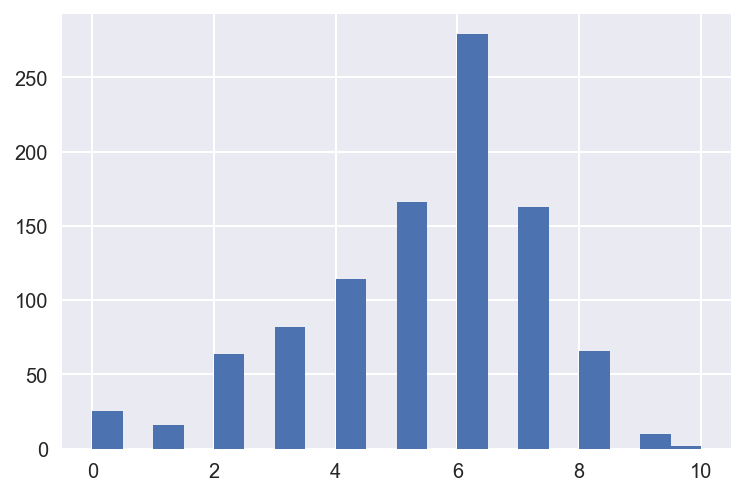

In [68]:
# 比较 2008 年至 2018 年温室气体排放量的分布情况
df_08.greenhouse_gas_score.hist(bins=20);

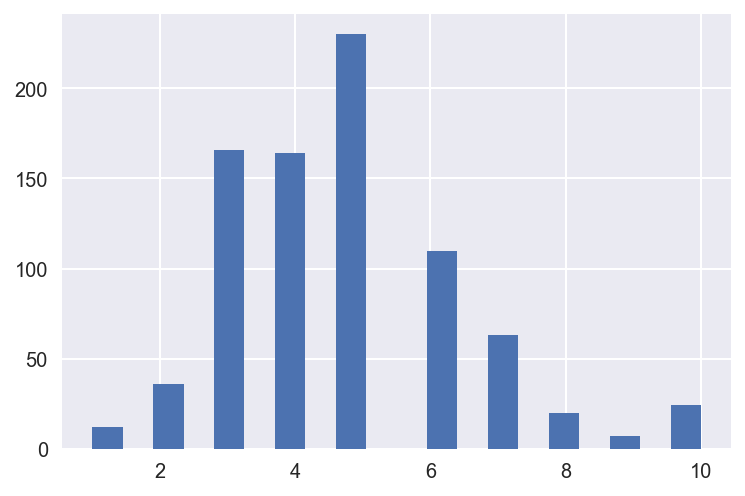

In [69]:
df_18.greenhouse_gas_score.hist(bins=20);

2008年的分布更偏向左边。

### 3.2 从 2008 年到 2018 年，综合 mpg 的分布是如何变化的

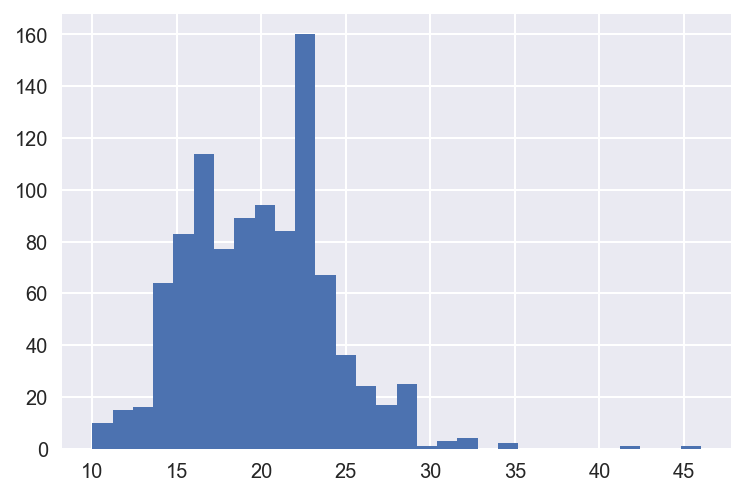

In [70]:
# 从 2008 年到 2018 年，综合 mpg 的分布是如何变化的？
df_08.cmb_mpg.hist(bins=30);

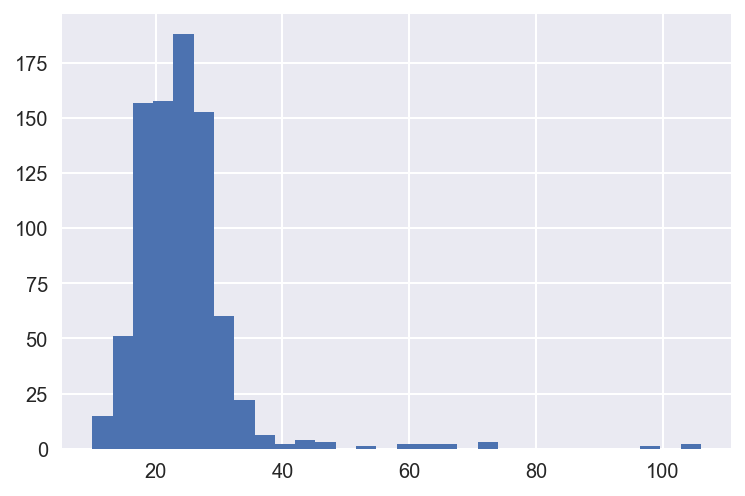

In [71]:
df_18.cmb_mpg.hist(bins=30);

从 2008 年到 2018 年，综合 mpg 的分布变得更偏向右边。

### 3.3 发动机排量和综合mpg之间的相关性

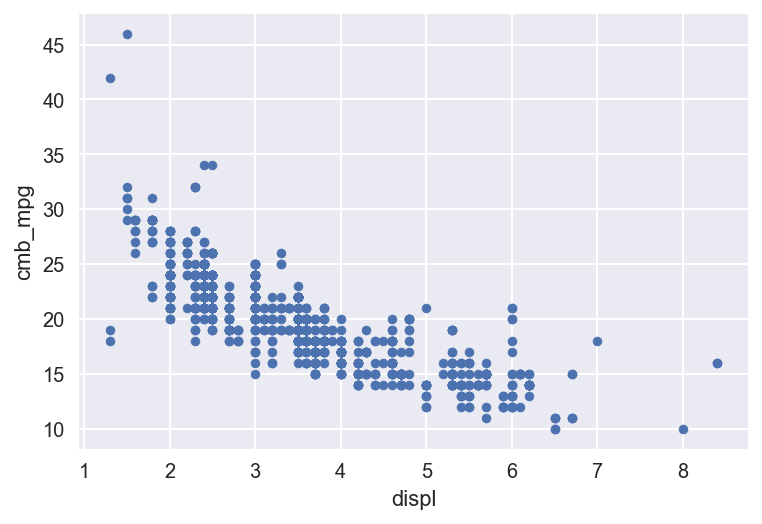

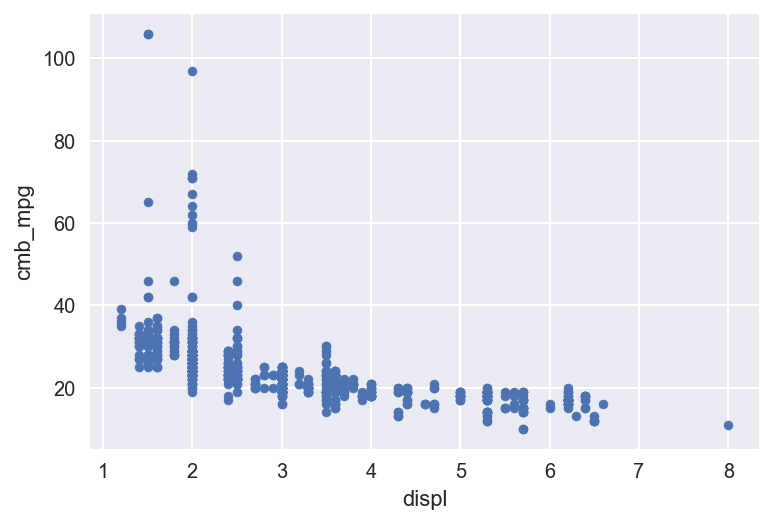

In [72]:
# 描述发动机排量和综合mpg之间的相关性
df_08.plot(kind='scatter',x='displ', y='cmb_mpg');
df_18.plot(kind='scatter',x='displ', y='cmb_mpg');

发动机排量和综合mpg之间具有负相关性。

### 3.4 温室气体得分与综合 mpg 之间的相关性

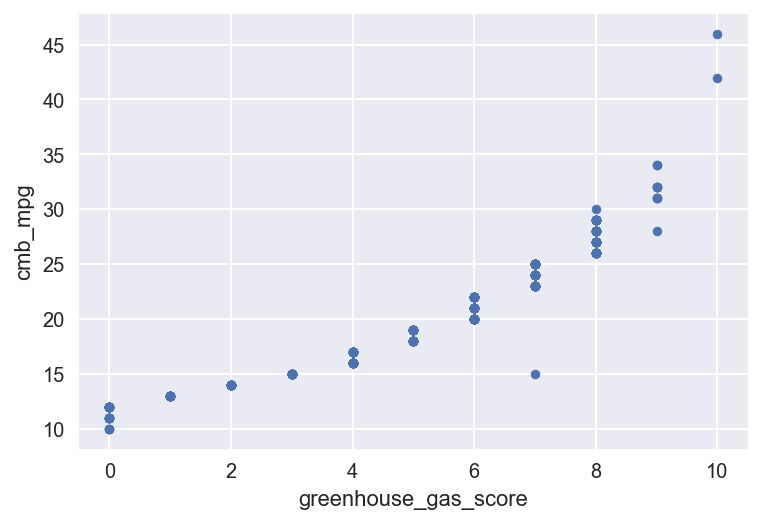

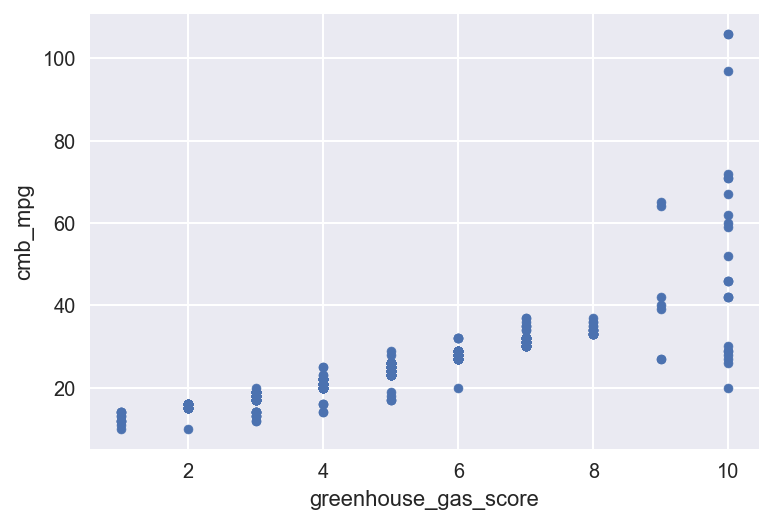

In [75]:
# 描述温室气体得分与综合 mpg 之间的相关性
df_08.plot(kind='scatter', x='greenhouse_gas_score', y='cmb_mpg');
df_18.plot(kind='scatter', x='greenhouse_gas_score', y='cmb_mpg');

温室气体得分与综合 mpg 之间的相关性。

<a id='conclusions'></a>
## 四. 结论及可视化展示

### 4.1是否有更多使用替代燃料来源的不同车型？ 具体多多少？

In [76]:
# 查看08年fuel的所有类型
df_08.fuel.unique()

array(['Gasoline', 'CNG', 'ethanol', 'gas'], dtype=object)

其中CNG，ethanol为替代性燃料来源。

In [77]:
# 保存08年使用替代性燃料的不同车型个数
alt_08 = df_08[(df_08.fuel == 'CNG') | (df_08.fuel == 'ethanol')].model.nunique()
alt_08

2

In [78]:
# 查看08年fuel的所有类型
df_18.fuel.unique()

array(['Gasoline', 'Diesel', 'Ethanol', 'Electricity', 'Gas'],
      dtype=object)

其中Electricity，Ethanol为替代性燃料来源。

In [79]:
# 保存18年使用替代性燃料的不同车型个数
alt_18 = df_18[(df_18.fuel == 'Ethanol') | (df_18.fuel == 'Electricity')].model.nunique()
alt_18

26

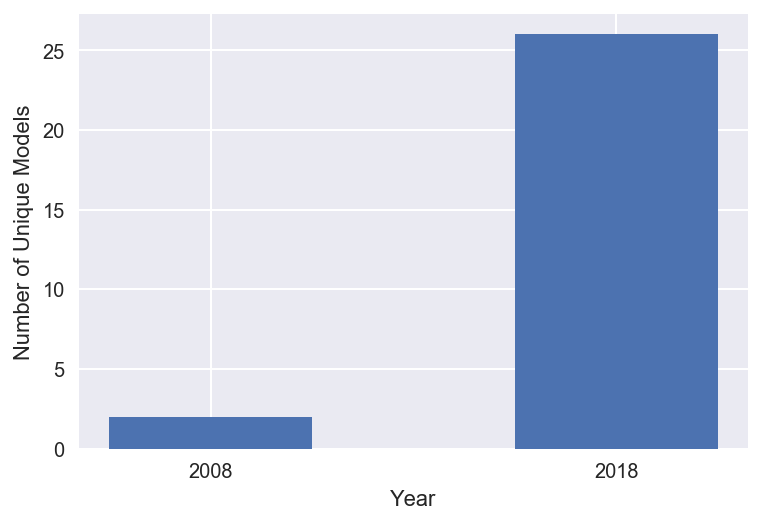

In [80]:
# 对比图
plt.bar(x=['2008','2018'], height=[alt_08, alt_18], width=0.5)
plt.xlabel('Year')
plt.ylabel('Number of Unique Models');

从2008年到2018年有更多车型使用替代性燃料来源，具体增加了24种。

### 4.2 不同车辆种类在燃油经济性方面有多少改进？

In [82]:
# 2008年个车辆类型的平均 综合mpg
mpg_08 = df_08.groupby('veh_class')['cmb_mpg'].mean()
# 2018年个车辆类型的平均 综合mpg
mpg_18 = df_18.groupby('veh_class')['cmb_mpg'].mean()

In [83]:
inc = mpg_18 - mpg_08
inc

veh_class
SUV                     NaN
large car          4.900000
midsize car        6.282609
minivan            1.682353
pickup             2.312635
small SUV               NaN
small car          4.315948
special purpose         NaN
standard SUV            NaN
station wagon      5.162745
van                     NaN
Name: cmb_mpg, dtype: float64

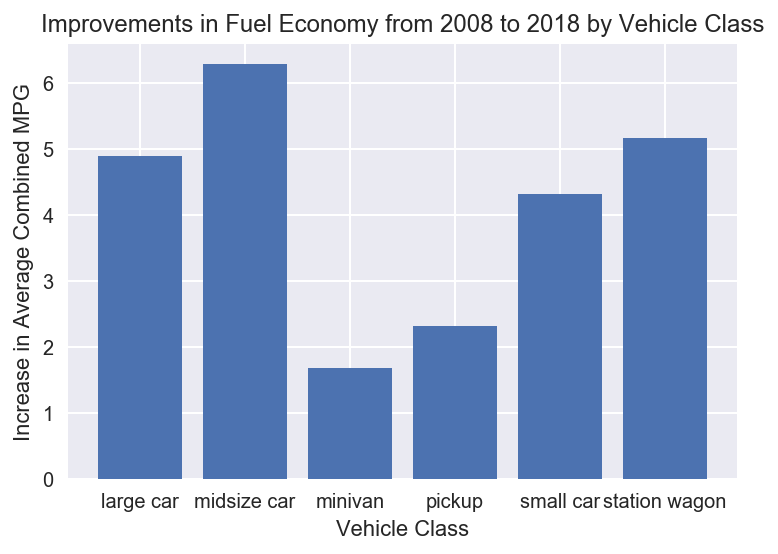

In [84]:
inc.dropna(inplace=True)

# 
plt.bar(x=inc.index, height=inc);
plt.title('Improvements in Fuel Economy from 2008 to 2018 by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Increase in Average Combined MPG');

### 4.3 SmartWay车辆的特点是什么？它们是否随着时间而改变？

探索2008年smartway车辆的特点。

In [91]:
# 将2008 年数据集分为smartway数据集和非smartway数据集
smart_08 = df_08.loc[df_08.smartway == 'yes']
no_08 = df_08.query('smartway == "no"')

# 将2018 年数据集分为smartway数据集和非smartway数据集
smart_18 = df_18.query('smartway in ["Yes","Elite"]')
no_18 = df_18.query('smartway == "No"')

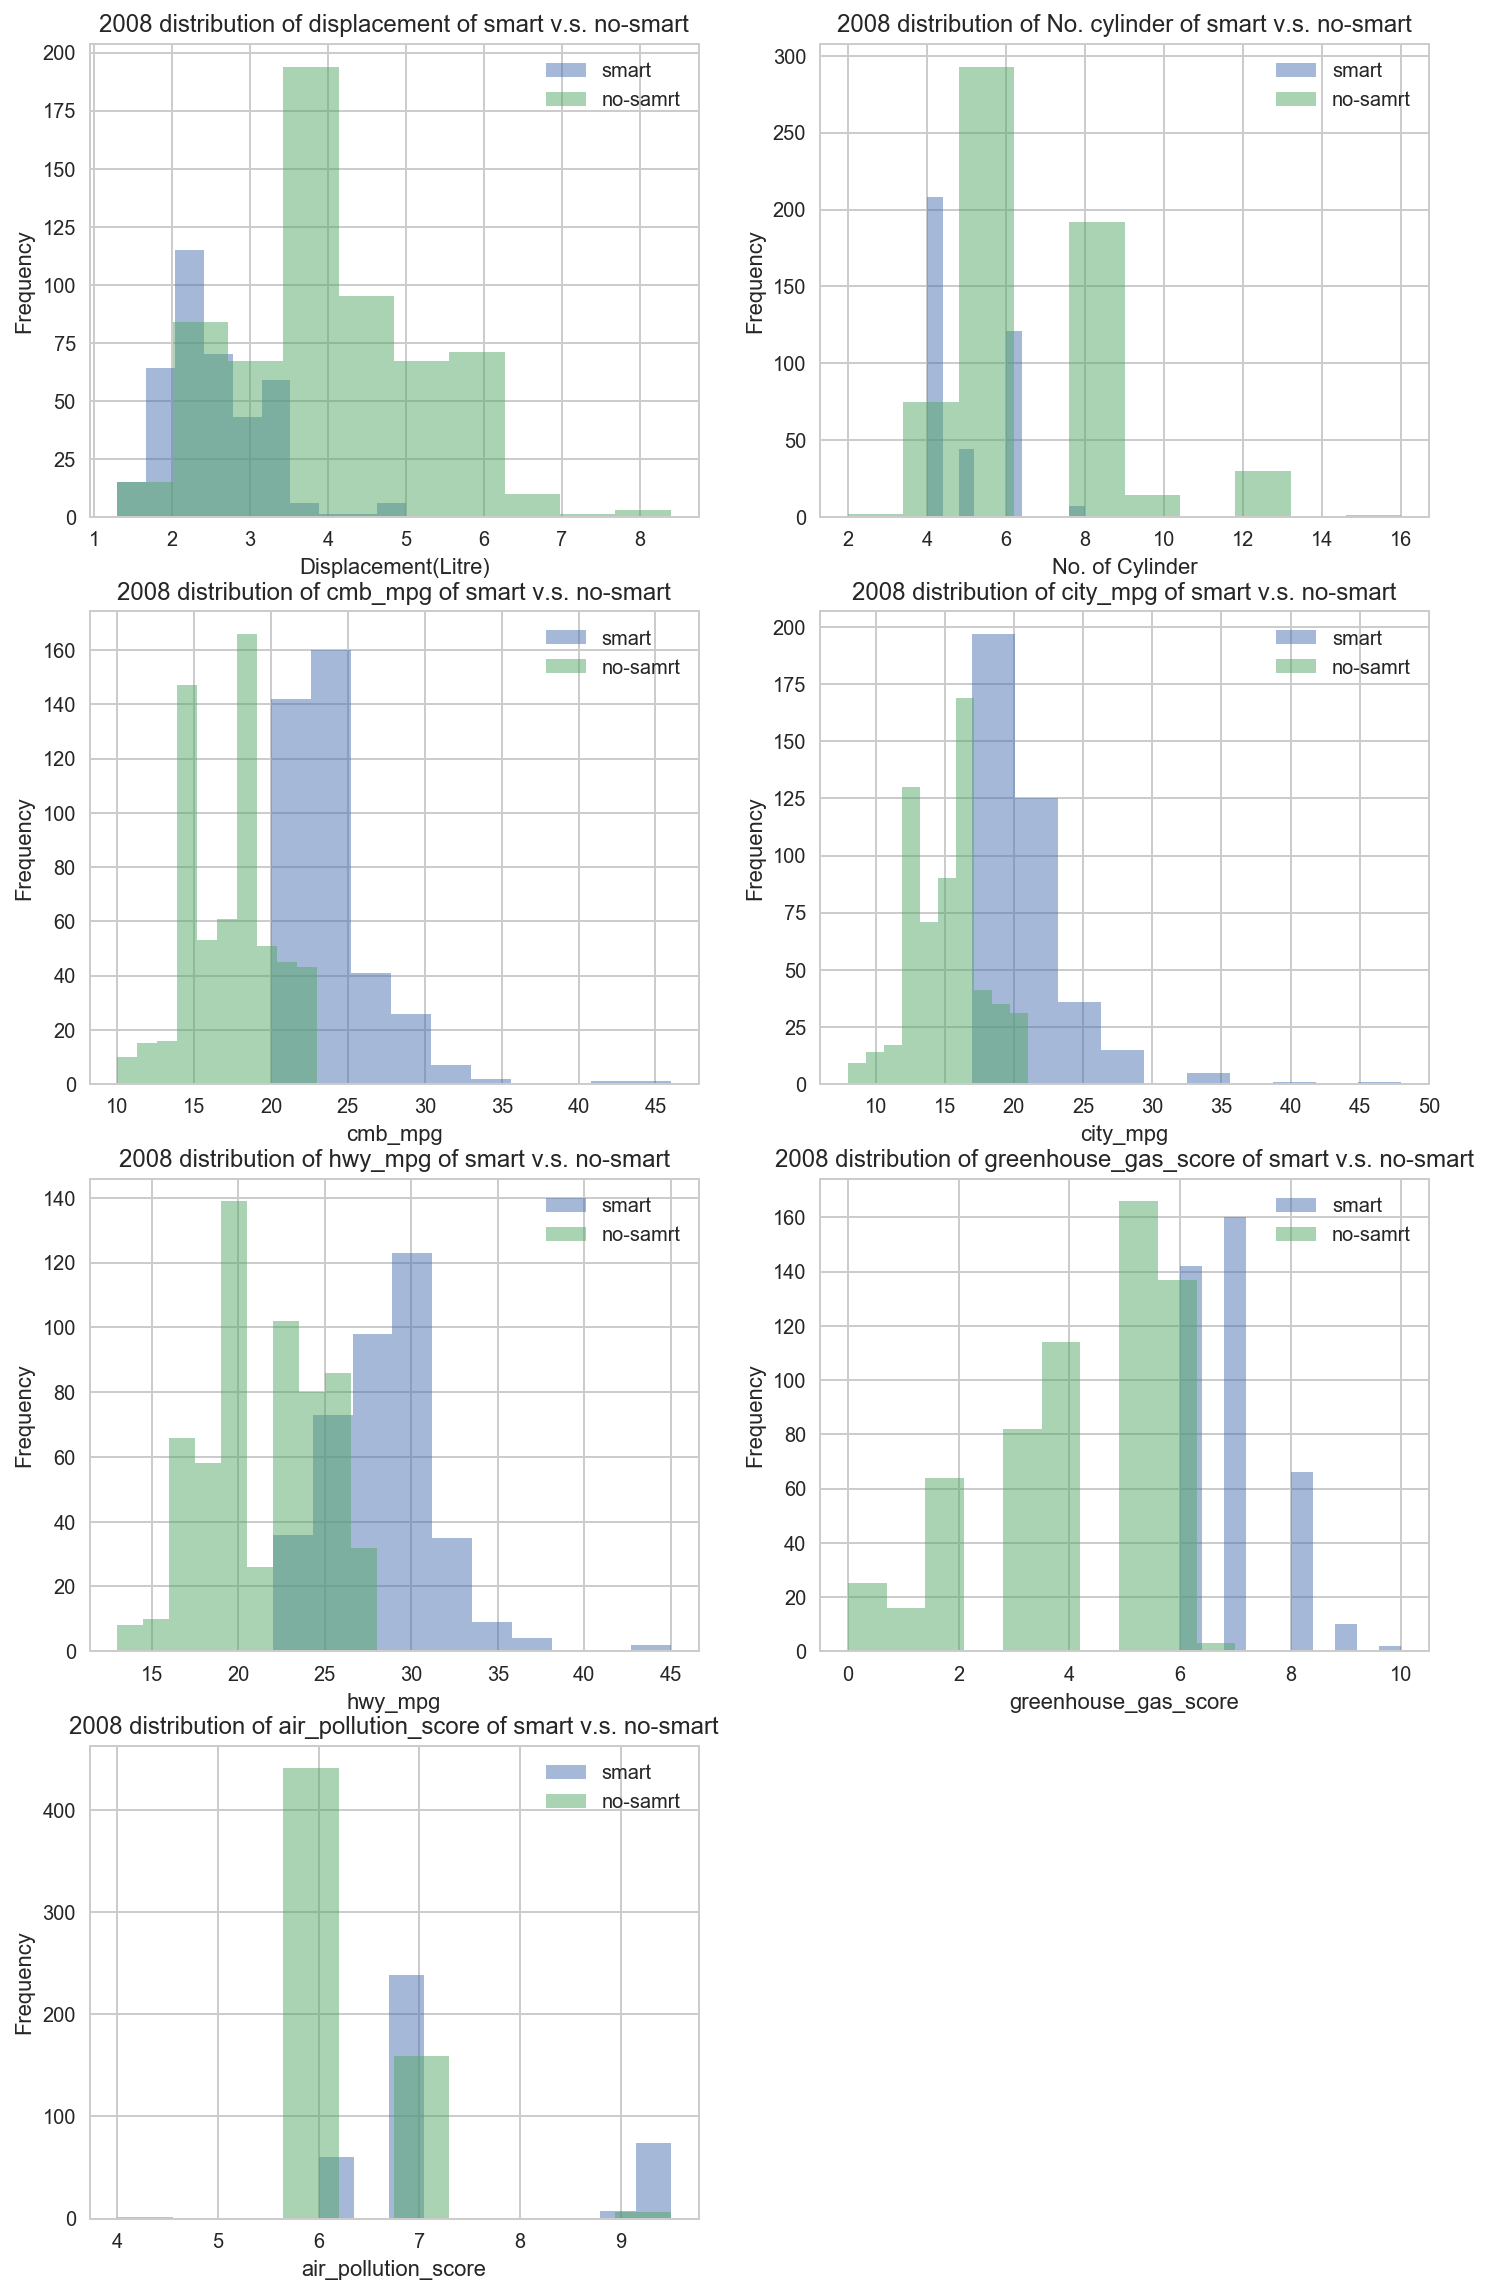

In [92]:
# 将2008年的smart车辆的numeric data 和非smart车辆的进行对比
plt.figure(figsize=(12,20))

# 对比两组数据（smart车辆和非smart车辆）的排量分布
plt.subplot(421)
plt.hist(smart_08.displ, alpha=0.5, label='smart')
plt.hist(no_08.displ, alpha=0.5, label='no-samrt')
plt.title('2008 distribution of displacement of smart v.s. no-smart')
plt.xlabel('Displacement(Litre)')
plt.ylabel('Frequency')
plt.legend();

# 对比两组数据（smart车辆和非smart车辆）的气缸数量分布
plt.subplot(422)
plt.hist(smart_08.cyl, alpha=0.5, label='smart')
plt.hist(no_08.cyl, alpha=0.5, label='no-samrt')
plt.title('2008 distribution of No. cylinder of smart v.s. no-smart')
plt.xlabel('No. of Cylinder')
plt.ylabel('Frequency')
plt.legend();

# 对比两组数据（smart车辆和非smart车辆）的综合mpg分布
plt.subplot(423)
plt.hist(smart_08.cmb_mpg, alpha=0.5, label='smart')
plt.hist(no_08.cmb_mpg, alpha=0.5, label='no-samrt')
plt.title('2008 distribution of cmb_mpg of smart v.s. no-smart')
plt.xlabel('cmb_mpg')
plt.ylabel('Frequency')
plt.legend();

# 对比两组数据（smart车辆和非smart车辆）的城市mpg分布
plt.subplot(424)
plt.hist(smart_08.city_mpg, alpha=0.5, label='smart')
plt.hist(no_08.city_mpg, alpha=0.5, label='no-samrt')
plt.title('2008 distribution of city_mpg of smart v.s. no-smart')
plt.xlabel('city_mpg')
plt.ylabel('Frequency')
plt.legend();

# 对比两组数据（smart车辆和非smart车辆）的高速mpg分布
plt.subplot(425)
plt.hist(smart_08.hwy_mpg, alpha=0.5, label='smart')
plt.hist(no_08.hwy_mpg, alpha=0.5, label='no-samrt')
plt.title('2008 distribution of hwy_mpg of smart v.s. no-smart')
plt.xlabel('hwy_mpg')
plt.ylabel('Frequency')
plt.legend();

# 对比两组数据（smart车辆和非smart车辆）的温室气体评分分布
plt.subplot(426)
plt.hist(smart_08.greenhouse_gas_score, alpha=0.5, label='smart')
plt.hist(no_08.greenhouse_gas_score, alpha=0.5, label='no-samrt')
plt.title('2008 distribution of greenhouse_gas_score of smart v.s. no-smart')
plt.xlabel('greenhouse_gas_score')
plt.ylabel('Frequency')
plt.legend();

# 对比两组数据（smart车辆和非smart车辆）的空气污染评分分布
plt.subplot(427)
plt.hist(smart_08.air_pollution_score, alpha=0.5, label='smart')
plt.hist(no_08.air_pollution_score, alpha=0.5, label='no-samrt')
plt.title('2008 distribution of air_pollution_score of smart v.s. no-smart')
plt.xlabel('air_pollution_score')
plt.ylabel('Frequency')
plt.legend();

观察以上分布可看出，2008年smart车辆的特点有排量小，综合mpg高，温室气体评分高的特点。

再来探索2018年smartway车辆的特点。

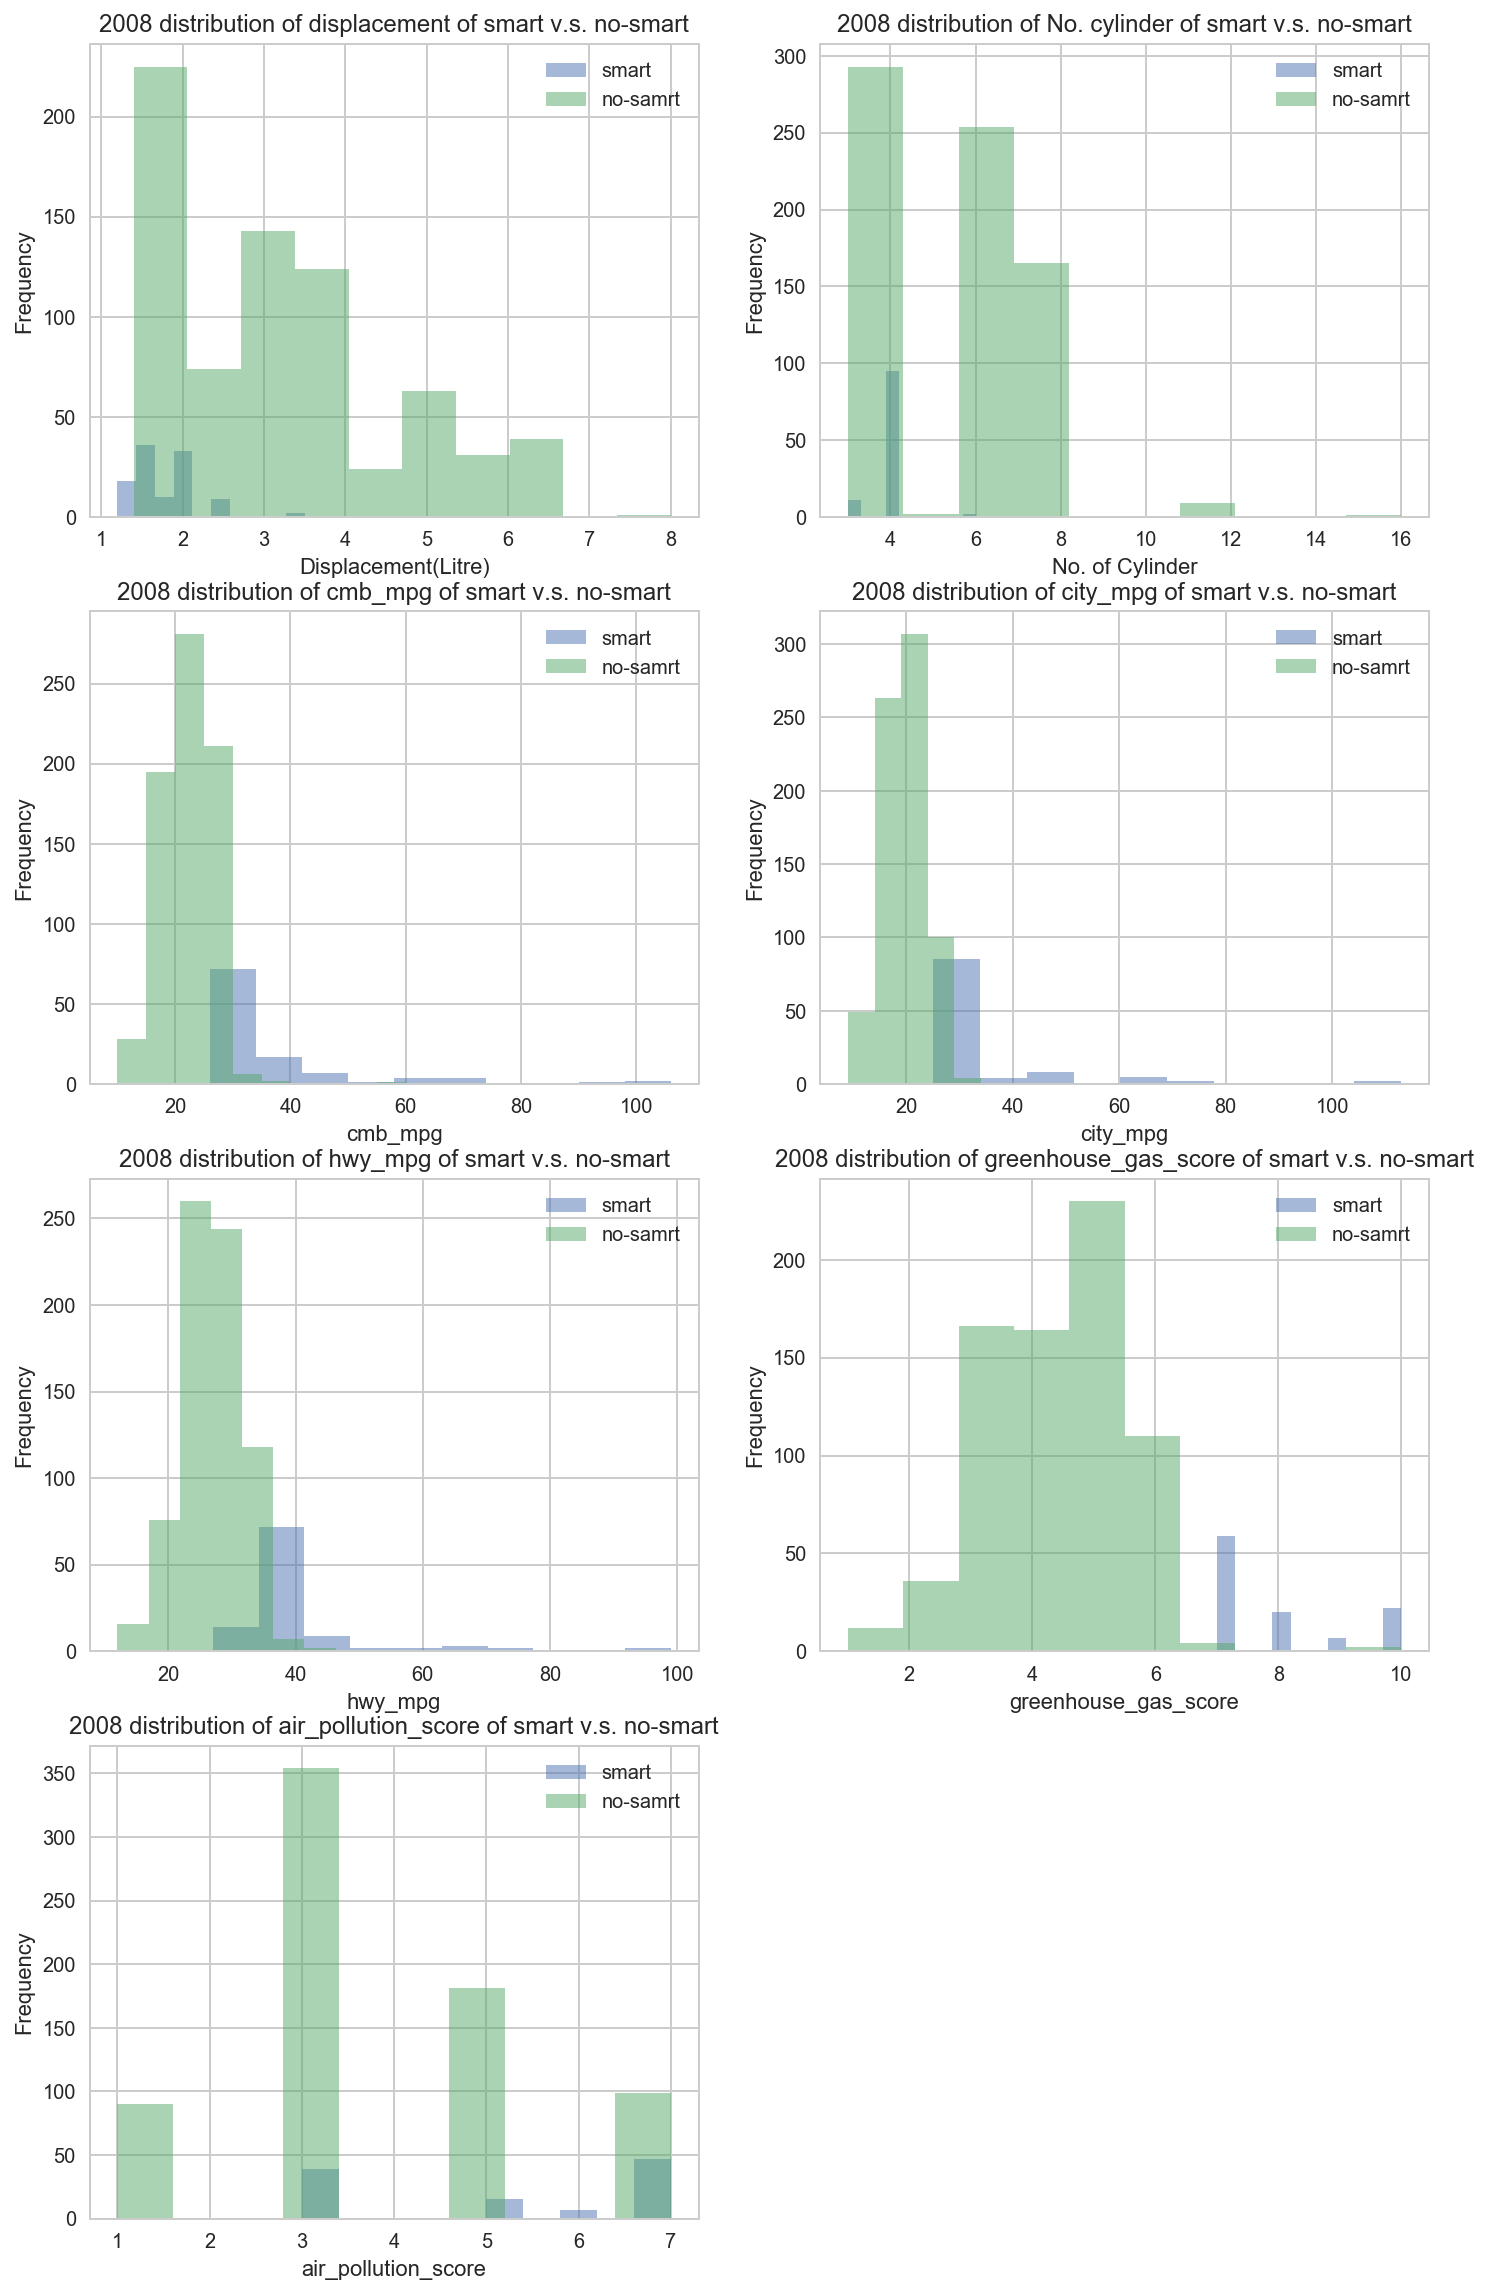

In [94]:
# 将2018年的smart车辆的numeric data 和非smart车辆的进行对比
plt.figure(figsize=(12,20))

# 对比两组数据（smart车辆和非smart车辆）的排量分布
plt.subplot(421)
plt.hist(smart_18.displ, alpha=0.5, label='smart')
plt.hist(no_18.displ, alpha=0.5, label='no-samrt')
plt.title('2008 distribution of displacement of smart v.s. no-smart')
plt.xlabel('Displacement(Litre)')
plt.ylabel('Frequency')
plt.legend();

# 对比两组数据（smart车辆和非smart车辆）的气缸数量分布
plt.subplot(422)
plt.hist(smart_18.cyl, alpha=0.5, label='smart')
plt.hist(no_18.cyl, alpha=0.5, label='no-samrt')
plt.title('2008 distribution of No. cylinder of smart v.s. no-smart')
plt.xlabel('No. of Cylinder')
plt.ylabel('Frequency')
plt.legend();

# 对比两组数据（smart车辆和非smart车辆）的综合mpg分布
plt.subplot(423)
plt.hist(smart_18.cmb_mpg, alpha=0.5, label='smart')
plt.hist(no_18.cmb_mpg, alpha=0.5, label='no-samrt')
plt.title('2008 distribution of cmb_mpg of smart v.s. no-smart')
plt.xlabel('cmb_mpg')
plt.ylabel('Frequency')
plt.legend();

# 对比两组数据（smart车辆和非smart车辆）的城市mpg分布
plt.subplot(424)
plt.hist(smart_18.city_mpg, alpha=0.5, label='smart')
plt.hist(no_18.city_mpg, alpha=0.5, label='no-samrt')
plt.title('2008 distribution of city_mpg of smart v.s. no-smart')
plt.xlabel('city_mpg')
plt.ylabel('Frequency')
plt.legend();

# 对比两组数据（smart车辆和非smart车辆）的高速mpg分布
plt.subplot(425)
plt.hist(smart_18.hwy_mpg, alpha=0.5, label='smart')
plt.hist(no_18.hwy_mpg, alpha=0.5, label='no-samrt')
plt.title('2008 distribution of hwy_mpg of smart v.s. no-smart')
plt.xlabel('hwy_mpg')
plt.ylabel('Frequency')
plt.legend();

# 对比两组数据（smart车辆和非smart车辆）的温室气体评分分布
plt.subplot(426)
plt.hist(smart_18.greenhouse_gas_score, alpha=0.5, label='smart')
plt.hist(no_18.greenhouse_gas_score, alpha=0.5, label='no-samrt')
plt.title('2008 distribution of greenhouse_gas_score of smart v.s. no-smart')
plt.xlabel('greenhouse_gas_score')
plt.ylabel('Frequency')
plt.legend();

# 对比两组数据（smart车辆和非smart车辆）的空气污染评分分布
plt.subplot(427)
plt.hist(smart_18.air_pollution_score, alpha=0.5, label='smart')
plt.hist(no_18.air_pollution_score, alpha=0.5, label='no-samrt')
plt.title('2008 distribution of air_pollution_score of smart v.s. no-smart')
plt.xlabel('air_pollution_score')
plt.ylabel('Frequency')
plt.legend();

观察发现：与2008年smart车辆的特点基本一致。2018年smart车辆的特点有排量小，综合mpg高，温室气体评分高的特点。

### 4.4 哪些特征与更好的燃料经济型相关联？

In [89]:
sns.set_style('whitegrid')

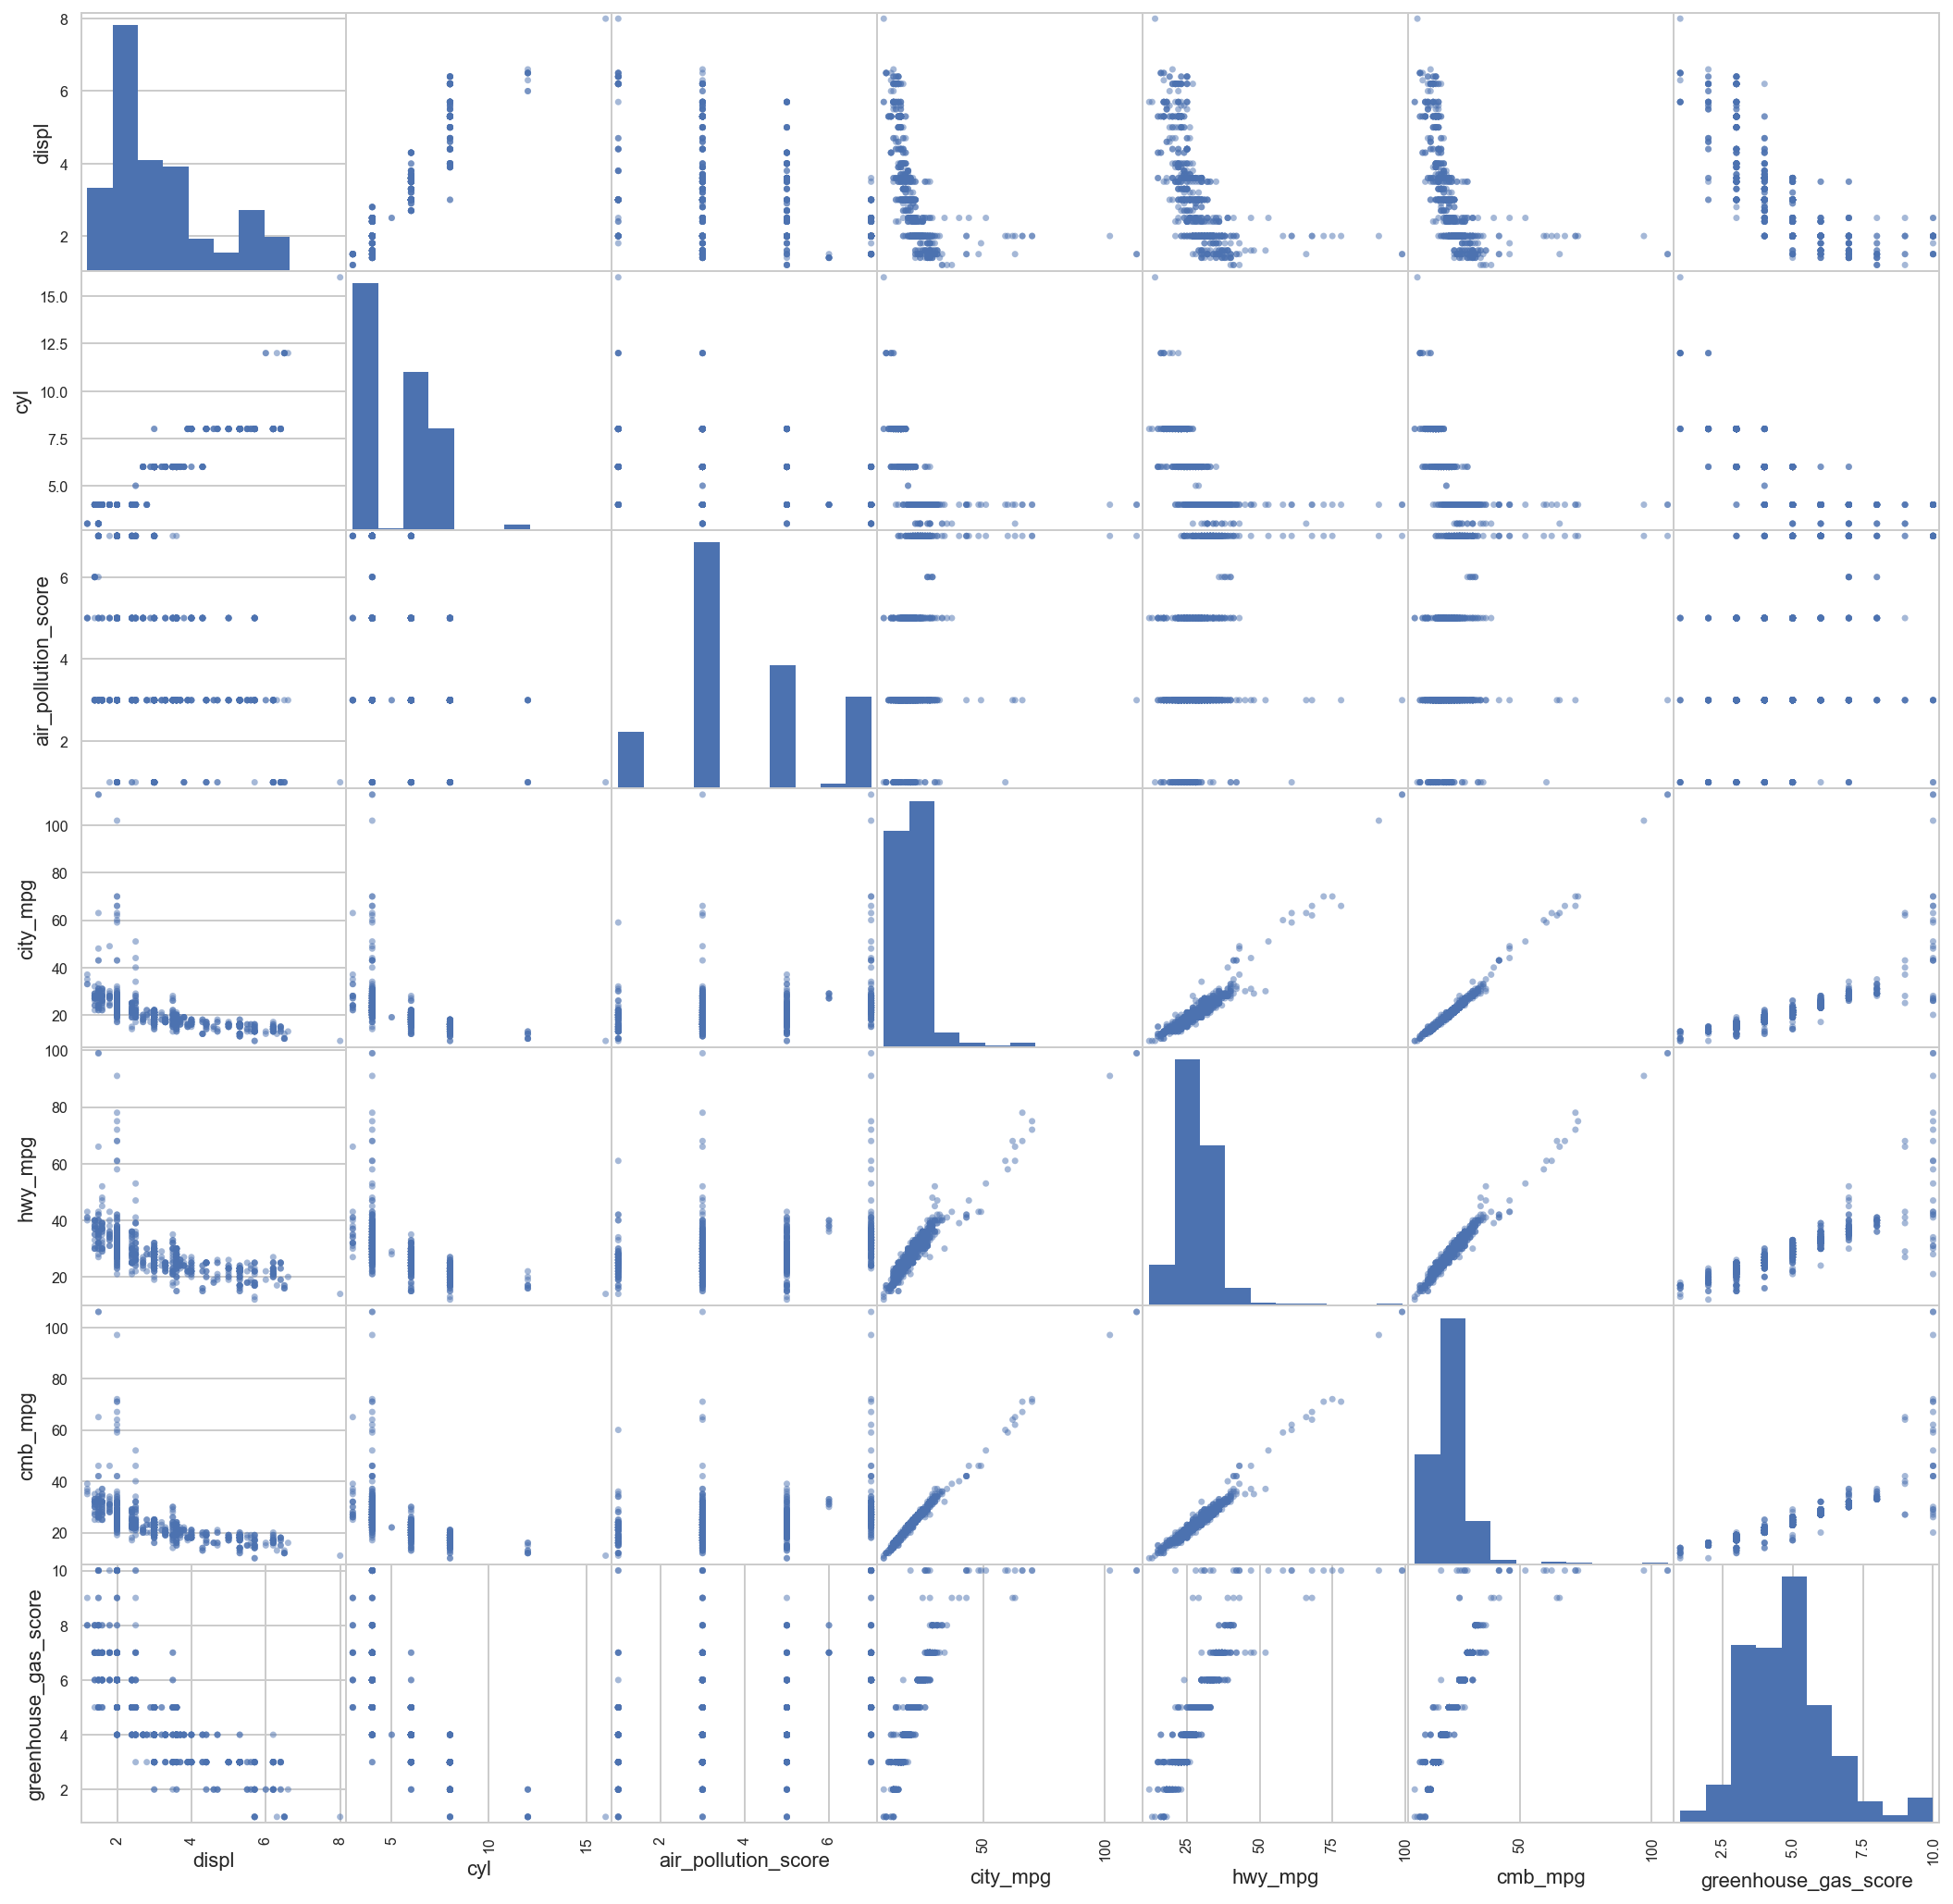

In [90]:
pd.plotting.scatter_matrix(df_18, figsize=(18,18));

从图中可以看出燃料经济性和汽车排量具有较强的负相关性，和温室气体评分具有很强的正相关性。
